# Linear Regression

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import os
import matplotlib.pyplot as plt
import glob

In [14]:
df_train =  pd.read_csv(os.path.join('Data','Modeling','Training&Testing','train_dist_total.csv'), header=0, skiprows=0)
df_train = df_train.drop('Unnamed: 0', axis = 1)
#df_train = df_train.drop(['bin','bowl','bucket','misc_short','jar','pottedplant','tire','misc_tall'], axis = 1)
df_test = pd.read_csv(os.path.join('Data','Modeling','Training&Testing','test_dist_total.csv'), header=0, skiprows=0)
df_test = df_test.drop('Unnamed: 0', axis = 1)
#df_test = df_test.drop(['bin','bowl','bucket','misc_short','jar','pottedplant','tire','misc_tall'], axis = 1)
df_test_week_addrcode = df_test.iloc[:,[0,1,2,3]]

In [15]:
df_train.head()

,addrcode,Week,Year,rainfall,temperature,DF_6,DF_5,DF_4,DF_3,DF_2,...,bin_pop9s,bowl_pop9s,bucket_pop9s,misc_short_pop9s,jar_pop9s,pottedplant_pop9s,tire_pop9s,misc_tall_pop9s,total_pop9s,WeekYear
0,8001,15,2014,392.79,534.055000,0.111947,0.000000,0.111947,0.037316,0.111947,...,0.437153,0.02127,1.557183,0.030039,0.066235,1.366126,0.233969,0.003732,3.715707,152014
1,8001,16,2014,900.96,529.350179,0.037316,0.111947,0.000000,0.111947,0.037316,...,0.437153,0.02127,1.557183,0.030039,0.066235,1.366126,0.233969,0.003732,3.715707,162014
2,8001,17,2014,231.32,534.402321,0.074631,0.037316,0.111947,0.000000,0.111947,...,0.437153,0.02127,1.557183,0.030039,0.066235,1.366126,0.233969,0.003732,3.715707,172014
3,8001,18,2014,160.58,533.296429,0.186578,0.074631,0.037316,0.111947,0.000000,...,0.437153,0.02127,1.557183,0.030039,0.066235,1.366126,0.233969,0.003732,3.715707,182014
4,8001,19,2014,772.69,519.859821,0.223894,0.186578,0.074631,0.037316,0.111947,...,0.437153,0.02127,1.557183,0.030039,0.066235,1.366126,0.233969,0.003732,3.715707,192014


### [Subdistrict]

Linear Regression R squared: 0.1296
Linear Regression RMSE: 0.3816
Linear Regression MAE: 0.2672




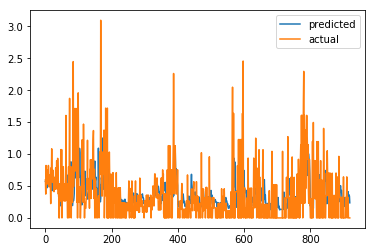

In [16]:
################ Without CD ################

#X_train = df_train.iloc[:,range(4,26)]
X_train = df_train.iloc[:,[9,10,11,12,13,14]]
Y_train = df_train.iloc[:,[5]]
#X_test = df_test.iloc[:,range(4,26)]
X_test = df_test.iloc[:,[9,10,11,12,13,14]]
Y_test = df_test.iloc[:,[5]]

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, Y_test))

# calculate RMSE
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# calculate MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(Y_pred, Y_test)
print('Linear Regression MAE: %.4f' % lin_mae)
print('\n')

Y_test = Y_test.reset_index()
Y_test = Y_test.drop('index', axis = 1)
predicted = pd.DataFrame({'Predicted':Y_pred[:,0]})
df_compare = pd.concat([predicted,Y_test], axis = 1)
df_compare.columns = ['predicted', 'actual']
df_compare_addrcode = pd.concat([df_test_week_addrcode, df_compare], axis = 1)
#df_compare_addrcode.to_csv('linear_regression_compare_subdist_withoutCD.csv', encoding = 'utf-8')
plot = plt.plot(df_compare)
#plot = plt.ylabel('y')
#plot = plt.xlabel('x')
plot = plt.legend(['predicted', 'actual'])

Linear Regression R squared: 0.1392
Linear Regression RMSE: 0.3795
Linear Regression MAE: 0.2675




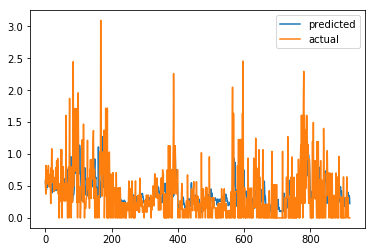

In [17]:
################ With CD ################

#X_train = df_train.iloc[:,range(4,26)]
X_train = df_train.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Y_train = df_train.iloc[:,[5]]
#X_test = df_test.iloc[:,range(4,26)]
X_test = df_test.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]]
Y_test = df_test.iloc[:,[5]]


#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, Y_test))

# calculate RMSE
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# calculate MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(Y_pred, Y_test)
print('Linear Regression MAE: %.4f' % lin_mae)
print('\n')

Y_test = Y_test.reset_index()
Y_test = Y_test.drop('index', axis = 1)
predicted = pd.DataFrame({'Predicted':Y_pred[:,0]})
df_compare = pd.concat([predicted,Y_test], axis = 1)
df_compare.columns = ['predicted', 'actual']
df_compare_addrcode = pd.concat([df_test_week_addrcode, df_compare], axis = 1)
df_compare_addrcode.to_csv('linear_regression_compare_subdist_withCD.csv', encoding = 'utf-8')
plot = plt.plot(df_compare)
#plot = plt.ylabel('y')
#plot = plt.xlabel('x')
plot = plt.legend(['predicted', 'actual'])


### [District]

In [53]:
df_train_dist =  pd.read_csv(os.path.join('Data','Modeling','Training&Testing','train_dist.csv'), header=0, skiprows=0)
df_test_dist = pd.read_csv(os.path.join('Data','Modeling','Training&Testing','test_dist.csv'), header=0, skiprows=0)
df_test_week_addrcode_dist = df_test_dist.iloc[:,[0,1,2]]

Linear Regression R squared: 0.1719
Linear Regression RMSE: 2.7592
Linear Regression MAE: 1.7612




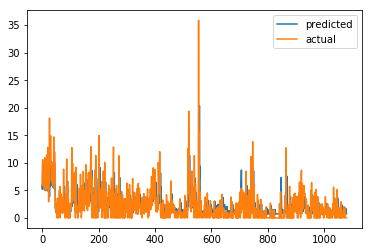

In [56]:
################ Without CD ################

#X_train = df_train.iloc[:,range(4,26)]
X_train = df_train_dist.iloc[:,[6,12,18,19,20,21,22,23,24,25,26]]
Y_train = df_train_dist.iloc[:,[3]]
#X_test = df_test.iloc[:,range(4,26)]
X_test = df_test_dist.iloc[:,[6,12,18,19,20,21,22,23,24,25,26]]
Y_test = df_test_dist.iloc[:,[3]]

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, Y_test))

# calculate RMSE
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# calculate MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(Y_pred, Y_test)
print('Linear Regression MAE: %.4f' % lin_mae)
print('\n')

Y_test = Y_test.reset_index()
Y_test = Y_test.drop('index', axis = 1)
predicted = pd.DataFrame({'Predicted':Y_pred[:,0]})
df_compare = pd.concat([predicted,Y_test], axis = 1)
df_compare.columns = ['predicted', 'actual']
df_compare_addrcode_dist = pd.concat([df_test_week_addrcode_dist, df_compare], axis = 1)
df_compare_addrcode_dist.to_csv('linear_regression_compare_dist_withoutCD.csv', encoding = 'utf-8')
plot = plt.plot(df_compare)
#plot = plt.ylabel('y')
#plot = plt.xlabel('x')
plot = plt.legend(['predicted', 'actual'])

Linear Regression R squared: 0.1687
Linear Regression RMSE: 2.7645
Linear Regression MAE: 1.7830




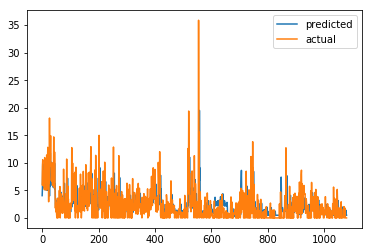

In [57]:
################ With CD ################

#X_train = df_train.iloc[:,range(4,26)]
X_train = df_train_dist.iloc[:,[6,12,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
Y_train = df_train_dist.iloc[:,[3]]
#X_test = df_test.iloc[:,range(4,26)]
X_test = df_test_dist.iloc[:,[6,12,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34]]
Y_test = df_test_dist.iloc[:,[3]]

#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
Y_pred = regressor.predict(X_test)
print('Linear Regression R squared: %.4f' % regressor.score(X_test, Y_test))

# calculate RMSE
lin_mse = mean_squared_error(Y_pred, Y_test)
lin_rmse = np.sqrt(lin_mse)
print('Linear Regression RMSE: %.4f' % lin_rmse)

# calculate MAE
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(Y_pred, Y_test)
print('Linear Regression MAE: %.4f' % lin_mae)
print('\n')

Y_test = Y_test.reset_index()
Y_test = Y_test.drop('index', axis = 1)
predicted = pd.DataFrame({'Predicted':Y_pred[:,0]})
df_compare = pd.concat([predicted,Y_test], axis = 1)
df_compare.columns = ['predicted', 'actual']
df_compare_addrcode_dist = pd.concat([df_test_week_addrcode_dist, df_compare], axis = 1)
df_compare_addrcode_dist.to_csv('linear_regression_compare_dist_withCD.csv', encoding = 'utf-8')
plot = plt.plot(df_compare)
#plot = plt.ylabel('y')
#plot = plt.xlabel('x')
plot = plt.legend(['predicted', 'actual'])

## Separate files

#### [Subdistrict]

In [80]:
list_sub = glob.glob(os.path.join('Data','Modeling','Linear Regression','Province','Subdistrict','*'))
list_sub

['Data/Modeling/Linear Regression/Province/Subdistrict/LR_subdist_withCD.csv',
 'Data/Modeling/Linear Regression/Province/Subdistrict/LR_subdist_withoutCD.csv']

In [85]:
list_sub[0][:-4][53:]

'LR_subdist_withCD'

In [91]:
df_available = pd.read_csv(os.path.join('Data','Data Statistics','available_addrcode_subdistrict.csv'))
df_available['addrcode'] = df_available['addrcode'].astype(str)
addrcode_list = df_available['addrcode']
addrcode_nakhon_sub = []

for i in range(len(addrcode_list)):
    if addrcode_list[i].startswith('80'):
        addrcode_nakhon_sub.append(addrcode_list[i])

In [87]:
for i in range(len(list_sub)):
    for j in range(len(addrcode_nakhon_sub)):
        df_result = pd.read_csv(list_sub[i])
        df_result['addrcode'] = df_result['addrcode'].astype(str)
        df_result = df_result.drop('Unnamed: 0', axis =1 )
        df_result = df_result.loc[df_result['addrcode'] == addrcode_nakhon_sub[j]]
        df_result = df_result.reset_index()
        df_result = df_result.drop('index', axis = 1)
        df_result.to_csv(list_sub[i][:-4][53:]+'_'+addrcode_nakhon_sub[j]+'.csv', encoding = 'utf-8')

#### [District]

In [88]:
list_dist = glob.glob(os.path.join('Data','Modeling','Linear Regression','Province','District','*'))
list_dist

['Data/Modeling/Linear Regression/Province/District/LR_dist_withoutCD.csv',
 'Data/Modeling/Linear Regression/Province/District/LR_dist_withCD.csv']

In [94]:
list_dist[0][:-4][50:]

'LR_dist_withoutCD'

In [92]:
addrcode_nakhon_dist = []

for i in range(len(addrcode_nakhon_sub)):
    addrcode_nakhon_sub[i] = addrcode_nakhon_sub[i][:-2]
    addrcode_nakhon_dist.append(addrcode_nakhon_sub[i]) 
    
addrcode_nakhon_dist = list(set(addrcode_nakhon_dist))

In [95]:
for i in range(len(list_dist)):
    for j in range(len(addrcode_nakhon_dist)):
        df_result = pd.read_csv(list_dist[i])
        df_result['addrcode'] = df_result['addrcode'].astype(str)
        df_result = df_result.drop('Unnamed: 0', axis =1 )
        df_result = df_result.loc[df_result['addrcode'] == addrcode_nakhon_dist[j]]
        df_result = df_result.reset_index()
        df_result = df_result.drop('index', axis = 1)
        df_result.to_csv(list_dist[i][:-4][50:]+'_'+addrcode_nakhon_dist[j]+'.csv', encoding = 'utf-8')

## Compute Different and MAE

## Seperated Level

#### [Subdistrict]

In [69]:
file_sub = glob.glob(os.path.join('Data','Modeling','Linear Regression','Separated','Subdistrict','*'))
len(file_sub)

334

In [70]:
file_sub[0][54:]

'LR_subdist_withoutCD_800202.csv'

In [72]:
for i in range(len(file_sub)):
    df_diff = pd.read_csv(file_sub[i])
    df_diff = df_diff.drop('Unnamed: 0', axis = 1)
    df_diff['different'] = df_diff['predicted'] - df_diff['actual']
    df_diff['different'] = df_diff['different'].abs()
    df_diff.loc[len(df_diff)] = ['MAE',None,None,None,None,df_diff['different'].sum()/len(df_diff)]
    df_diff.to_csv(file_sub[i])

#### [District]

In [96]:
file_dist = glob.glob(os.path.join('Data','Modeling','Linear Regression','Separated','District','*'))
len(file_dist)

46

In [97]:
file_dist[0][51:]

'LR_dist_withoutCD_8022.csv'

In [98]:
for i in range(len(file_dist)):
    df_diff = pd.read_csv(file_dist[i])
    df_diff = df_diff.drop('Unnamed: 0', axis = 1)
    df_diff['different'] = df_diff['predicted'] - df_diff['actual']
    df_diff['different'] = df_diff['different'].abs()
    df_diff.loc[len(df_diff)] = ['MAE',None,None,None,None,df_diff['different'].sum()/len(df_diff)]
    df_diff.to_csv(file_dist[i])

## Province Level

### [Subdistrict]

In [101]:
file_pro_sub = glob.glob(os.path.join('Data','Modeling','Linear Regression','Province','Subdistrict','*'))
len(file_pro_sub)

2

In [106]:
file_pro_sub[0][53:][:-4]

'LR_subdist_withCD'

In [109]:
for i in range(len(file_pro_sub)):
    df_diff = pd.read_csv(file_pro_sub[i])
    df_diff = df_diff.drop('Unnamed: 0', axis = 1)
    df_diff['different'] = df_diff['predicted'] - df_diff['actual']
    df_diff['different'] = df_diff['different'].abs()
    df_diff.loc[len(df_diff)] = ['MAE',None,None,None,None,df_diff['different'].sum()/len(df_diff)]
    df_diff.to_csv(file_pro_sub[i][53:][:-4]+'_diff.csv')

### [District]

In [110]:
file_pro_dist = glob.glob(os.path.join('Data','Modeling','Linear Regression','Province','District','*'))
len(file_pro_dist)

2

In [112]:
file_pro_dist[0][50:][:-4]

'LR_dist_withoutCD'

In [113]:
for i in range(len(file_pro_dist)):
    df_diff = pd.read_csv(file_pro_dist[i])
    df_diff = df_diff.drop('Unnamed: 0', axis = 1)
    df_diff['different'] = df_diff['predicted'] - df_diff['actual']
    df_diff['different'] = df_diff['different'].abs()
    df_diff.loc[len(df_diff)] = ['MAE',None,None,None,None,df_diff['different'].sum()/len(df_diff)]
    df_diff.to_csv(file_pro_dist[i][50:][:-4]+'_diff.csv')